In [1]:
import os

# Define dataset paths
dataset_path = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/dataset"
splits = ["train", "test", "val"]

# Count images in each split
for split in splits:
    image_folder = os.path.join(dataset_path, "images", split)
    num_images = len([f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
    print(f"Number of images in {split}: {num_images}")

Number of images in train: 1245
Number of images in test: 244
Number of images in val: 247


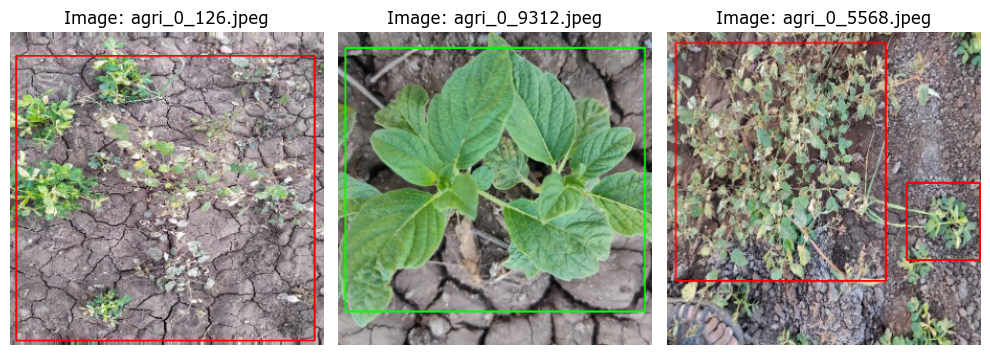

In [4]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def visualize_image(image_path, label_path):
    image = cv2.imread(image_path)
    with open(label_path, 'r') as f:
        labels = f.readlines()
    
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.strip().split())
        # Convert from relative coordinates to absolute pixel values
        h, w, _ = image.shape
        x_center = int(x_center * w)
        y_center = int(y_center * h)
        width = int(width * w)
        height = int(height * h)
        
        # Assign color based on class id (0 = crop, 1 = weed)
        color = (0, 255, 0) if class_id == 0 else (0, 0, 255)  # Green for crops, Red for weeds
        
        # Draw a rectangle around the detected object
        cv2.rectangle(image, (x_center - width // 2, y_center - height // 2),
                      (x_center + width // 2, y_center + height // 2), color, 2)
    
    # Resize image for better visibility
    image = cv2.resize(image, (300, 300))
    
    # Convert BGR to RGB for displaying with matplotlib
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Folder paths for your images and labels
image_folder = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/dataset/images/train"
label_folder = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/dataset/labels/train"

# Randomly select 3 images and display them
sample_images = random.sample(os.listdir(image_folder), 3)

# Create a subplot with 1 row and 3 columns for horizontal layout, and adjust figsize
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

for i, img_name in enumerate(sample_images):
    image_path = os.path.join(image_folder, img_name)
    
    # Ensure the extension is .txt and handle different image extensions
    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(label_folder, label_name)
    
    # Check if label file exists
    if os.path.exists(label_path):
        image = visualize_image(image_path, label_path)
        axes[i].imshow(image)
        axes[i].axis('off')  # Hide axes
        axes[i].set_title(f"Image: {img_name}", fontsize=12)
    else:
        print(f"Label file not found for {img_name}")
        axes[i].axis('off')  # Hide axes if no label is found
        axes[i].set_title(f"Image {i+1} (No Label)", fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [7]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # "n" is for nano, you can use "s", "m", "l" for different sizes

# Check if it's working
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [8]:
model.train(data="data.yaml", epochs=50, imgsz=512, batch=8)

New https://pypi.org/project/ultralytics/8.3.94 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.75  Python-3.8.20 torch-2.1.0+cu121 CUDA:0 (Quadro T1000, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

train: Scanning G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\labels\train.cache... 1245 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1245/1245 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


c:\miniconda3\envs\yolo_env\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\labels\val.cache... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.92G      1.391      2.158      1.621          6        512: 100%|██████████| 156/156 [00:37<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]


                   all        247        382      0.641      0.614      0.661      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.89G      1.442      1.708      1.604         18        512: 100%|██████████| 156/156 [00:35<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.15it/s]

                   all        247        382      0.462      0.586      0.462      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.89G      1.442      1.639      1.591         30        512: 100%|██████████| 156/156 [00:35<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.33it/s]

                   all        247        382      0.711      0.666      0.735       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.89G      1.399      1.492      1.562         12        512: 100%|██████████| 156/156 [00:35<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        247        382      0.821      0.587      0.727      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.89G      1.392      1.431      1.553         16        512: 100%|██████████| 156/156 [00:35<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.26it/s]

                   all        247        382       0.82      0.726      0.816      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.89G      1.346      1.331      1.524         17        512: 100%|██████████| 156/156 [00:35<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.37it/s]

                   all        247        382      0.813      0.722        0.8      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.89G      1.369      1.303      1.521         12        512: 100%|██████████| 156/156 [00:35<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        247        382      0.845      0.765      0.827      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.89G      1.337      1.245      1.511         12        512: 100%|██████████| 156/156 [00:35<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]

                   all        247        382      0.744      0.768      0.795      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.89G      1.298      1.196      1.476         16        512: 100%|██████████| 156/156 [00:35<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.07it/s]

                   all        247        382      0.884      0.737      0.835      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.89G      1.296       1.17       1.46         13        512: 100%|██████████| 156/156 [00:34<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        247        382      0.673      0.721      0.769      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.89G      1.268      1.139      1.469         12        512: 100%|██████████| 156/156 [00:34<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.55it/s]

                   all        247        382      0.792      0.786      0.824      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.89G      1.271      1.156      1.461         10        512: 100%|██████████| 156/156 [00:34<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.57it/s]

                   all        247        382      0.702      0.801      0.813      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.89G      1.252      1.121      1.454         13        512: 100%|██████████| 156/156 [00:34<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        247        382      0.774      0.795      0.829      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.89G      1.249      1.092       1.45          9        512: 100%|██████████| 156/156 [00:34<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        247        382      0.824      0.775      0.847      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.89G      1.231       1.06      1.439         24        512: 100%|██████████| 156/156 [00:35<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.37it/s]

                   all        247        382      0.854      0.723      0.835      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.89G      1.217       1.06      1.421         27        512: 100%|██████████| 156/156 [00:36<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.33it/s]

                   all        247        382      0.826      0.794      0.851      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.89G      1.196      1.036      1.413         10        512: 100%|██████████| 156/156 [00:35<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        247        382      0.855      0.758      0.858      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.89G      1.195      1.029      1.432         14        512: 100%|██████████| 156/156 [00:35<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.19it/s]

                   all        247        382      0.871      0.803      0.862       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.89G      1.207      1.016      1.416         25        512: 100%|██████████| 156/156 [00:36<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        247        382      0.816        0.8      0.849      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.89G      1.185     0.9791      1.399         17        512: 100%|██████████| 156/156 [00:34<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]

                   all        247        382      0.867      0.805      0.871      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.89G       1.17     0.9889      1.403         18        512: 100%|██████████| 156/156 [00:34<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.57it/s]

                   all        247        382      0.859      0.789      0.866      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.89G       1.17     0.9628      1.398         16        512: 100%|██████████| 156/156 [00:36<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.06it/s]

                   all        247        382      0.883      0.798       0.88       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.89G      1.169     0.9573      1.394         12        512: 100%|██████████| 156/156 [00:35<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.70it/s]

                   all        247        382      0.865      0.802      0.861      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.89G      1.178     0.9838      1.411         11        512: 100%|██████████| 156/156 [00:34<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        247        382      0.881      0.798      0.875      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.89G      1.153     0.9482      1.377         11        512: 100%|██████████| 156/156 [00:34<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        247        382      0.839      0.805      0.869      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.89G      1.147      0.926      1.371         16        512: 100%|██████████| 156/156 [00:34<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        247        382      0.837      0.815       0.88      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.89G      1.147      0.941      1.357         21        512: 100%|██████████| 156/156 [00:34<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        247        382      0.844      0.806      0.877      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.89G      1.125     0.9212      1.361         23        512: 100%|██████████| 156/156 [00:34<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        247        382      0.857       0.83       0.88      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.89G      1.152       0.93      1.365         13        512: 100%|██████████| 156/156 [00:34<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        247        382      0.847      0.848      0.901      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.89G      1.128     0.9023      1.348         17        512: 100%|██████████| 156/156 [00:34<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        247        382      0.866      0.814      0.889      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.89G      1.121     0.9051      1.353         17        512: 100%|██████████| 156/156 [00:33<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.77it/s]

                   all        247        382      0.869      0.819      0.889      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.89G      1.132     0.9199      1.359         26        512: 100%|██████████| 156/156 [00:36<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.08it/s]

                   all        247        382      0.853      0.806      0.884      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.89G      1.096     0.8818      1.347         18        512: 100%|██████████| 156/156 [00:36<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]

                   all        247        382       0.85      0.825      0.886      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.89G      1.118     0.8945      1.342         16        512: 100%|██████████| 156/156 [00:36<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.11it/s]

                   all        247        382       0.86       0.81      0.874      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.89G      1.077     0.8726      1.327         13        512: 100%|██████████| 156/156 [00:36<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.19it/s]

                   all        247        382      0.875      0.823      0.896      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.89G      1.087     0.8725      1.331         12        512: 100%|██████████| 156/156 [00:36<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.05it/s]

                   all        247        382      0.847      0.829       0.88      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.89G      1.076      0.851      1.329         14        512: 100%|██████████| 156/156 [00:36<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.03it/s]

                   all        247        382      0.858      0.838      0.897      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.89G      1.099     0.8506      1.351         28        512: 100%|██████████| 156/156 [00:36<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.03it/s]

                   all        247        382      0.863      0.834      0.895      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.89G      1.071      0.844      1.313         25        512: 100%|██████████| 156/156 [00:36<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.03it/s]

                   all        247        382      0.838      0.841      0.902      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.89G      1.072     0.8259      1.313         17        512: 100%|██████████| 156/156 [00:36<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.09it/s]

                   all        247        382      0.853      0.831      0.896      0.623


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.89G     0.9578     0.7277      1.325          6        512: 100%|██████████| 156/156 [00:43<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.07it/s]

                   all        247        382      0.847       0.83      0.896      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.89G     0.9313     0.6835      1.291         18        512: 100%|██████████| 156/156 [00:36<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.98it/s]

                   all        247        382      0.874       0.82      0.898      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.89G     0.9406     0.6762       1.31          5        512: 100%|██████████| 156/156 [00:36<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.07it/s]

                   all        247        382      0.848      0.826       0.89      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.89G     0.9311     0.6796      1.299          7        512: 100%|██████████| 156/156 [00:36<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]

                   all        247        382      0.868      0.852      0.908      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.89G     0.9278     0.6741      1.297         17        512: 100%|██████████| 156/156 [00:36<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.10it/s]

                   all        247        382      0.855      0.866      0.911      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.89G      0.923     0.6539      1.288          5        512: 100%|██████████| 156/156 [00:36<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.01it/s]

                   all        247        382      0.869      0.819      0.899      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.89G     0.8858     0.6397      1.259          6        512: 100%|██████████| 156/156 [00:36<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.02it/s]

                   all        247        382       0.87      0.834      0.904      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.89G     0.9065     0.6482      1.269         15        512: 100%|██████████| 156/156 [00:36<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.19it/s]

                   all        247        382      0.874      0.832      0.904      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.89G     0.8714      0.617      1.256          5        512: 100%|██████████| 156/156 [00:36<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.06it/s]

                   all        247        382       0.88       0.83      0.915      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.89G     0.8863     0.6311       1.26          7        512: 100%|██████████| 156/156 [00:36<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]

                   all        247        382      0.873      0.837      0.908       0.65



50 epochs completed in 0.559 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.75  Python-3.8.20 torch-2.1.0+cu121 CUDA:0 (Quadro T1000, 4096MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.02it/s]


                   all        247        382       0.88       0.83      0.915      0.652
                  crop        118        215      0.811      0.781      0.887      0.664
                  weed        129        167      0.948       0.88      0.942       0.64
Speed: 0.7ms preprocess, 6.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001A624E0C1C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [13]:
from ultralytics import YOLO
import os
import cv2

# Load the trained model
model = YOLO('G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/runs/detect/train/weights/best.pt')

# Path to the test images and the folder to save processed images
test_folder = 'G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/dataset/images/test'
output_folder = 'G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/dataset/images/test_output'

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get all image filenames from the test folder
image_files = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Function to save image with bounding boxes
def save_predictions(image_path, predictions, output_path):
    img = cv2.imread(image_path)
    
    # Draw bounding boxes on the image
    for box in predictions.boxes:
        # Extract box coordinates and class label
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        class_id = int(box.cls[0])
        label = model.names[class_id]  # Get class name from model
        confidence = box.conf[0]
        
        # Set color for different classes (crop: green, weed: red)
        color = (0, 255, 0) if label == "crop" else (255, 0, 0)
        
        # Draw rectangle and label
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Save the image with bounding boxes
    output_image_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_image_path, img)

# Iterate through all images in the test folder
for image_file in image_files:
    image_path = os.path.join(test_folder, image_file)
    
    # Run inference on the image
    results = model(image_path)

    # Get predictions from the results
    predictions = results[0]  # We only need the first result for a single image

    # Save the predictions on the image
    save_predictions(image_path, predictions, output_folder)

print("Images with bounding boxes have been saved to the output folder.")


image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1020.jpeg: 512x512 1 weed, 37.5ms
Speed: 4.1ms preprocess, 37.5ms inference, 10.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1041.jpeg: 512x512 1 crop, 38.6ms
Speed: 5.9ms preprocess, 38.6ms inference, 10.4ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1068.jpeg: 512x512 1 weed, 35.9ms
Speed: 5.5ms preprocess, 35.9ms inference, 9.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1119.jpeg: 512x512 1 crop, 35.8ms
Speed: 5.6ms preprocess, 35.8ms inference, 9.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\datase


image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1020.jpeg: 512x512 1 weed, 58.0ms
Speed: 4.0ms preprocess, 58.0ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1041.jpeg: 512x512 1 crop, 57.1ms
Speed: 4.0ms preprocess, 57.1ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1068.jpeg: 512x512 1 weed, 41.4ms
Speed: 3.4ms preprocess, 41.4ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset\images\test\agri_0_1119.jpeg: 512x512 1 crop, 40.3ms
Speed: 10.4ms preprocess, 40.3ms inference, 6.2ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\dataset

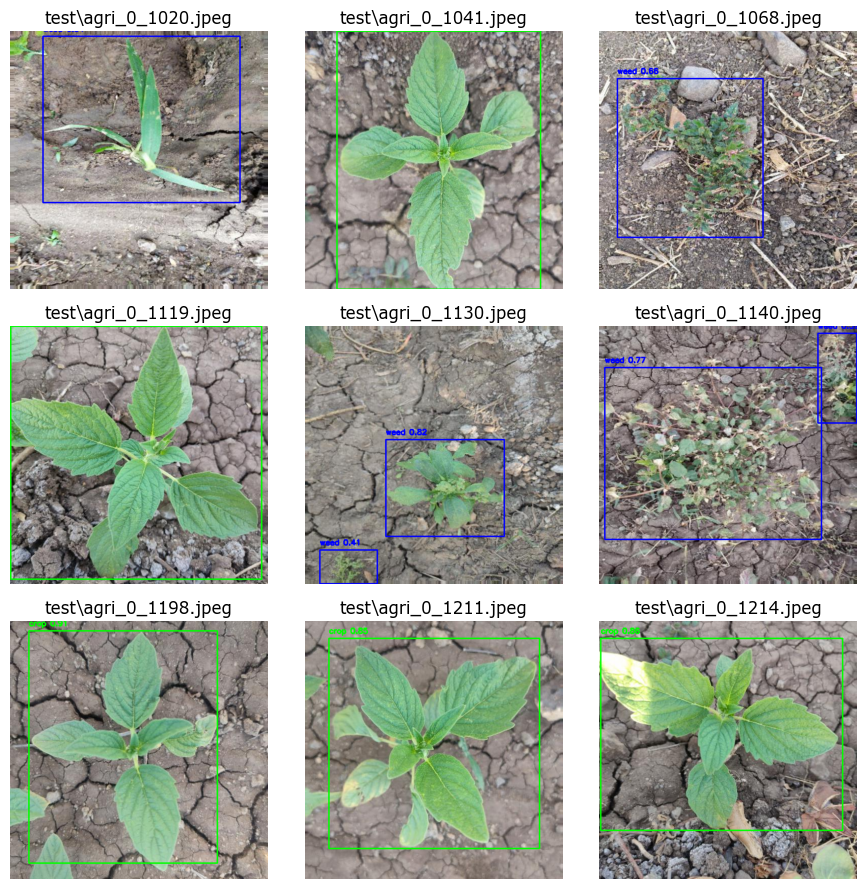

In [15]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/runs/detect/train/weights/best.pt')

# Path to the test images
test_folder = 'G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/dataset/images/test'

# Get all image filenames from the test folder
image_files = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Function to display image with bounding boxes
def display_predictions(image_path, predictions, ax):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Draw bounding boxes on the image
    for box in predictions.boxes:
        # Extract box coordinates and class label
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        class_id = int(box.cls[0])
        label = model.names[class_id]  # Get class name from model
        confidence = box.conf[0]
        
        # Set color for different classes (crop: green, weed: blue)
        color = (0, 255, 0) if label == "crop" else (0, 0, 255)
        
        # Draw rectangle and label
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the image in the provided axis (ax)
    ax.imshow(img)
    ax.set_title(image_path.split('/')[-1])  # Display image filename
    ax.axis('off')

# Create a 3x3 grid for displaying the images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))

# Loop through the first 9 images
for i, ax in enumerate(axes.flat):
    if i >= len(image_files):  # Stop if there are fewer than 9 images
        break
    image_file = image_files[i]
    image_path = os.path.join(test_folder, image_file)
    
    # Run inference on the image
    results = model(image_path)

    # Get predictions from the results
    predictions = results[0]  # We only need the first result for a single image

    # Display the predictions on the image
    display_predictions(image_path, predictions, ax)

# Adjust layout
plt.tight_layout()
plt.show()


image 1/1 G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v6\37020_jpg.rf.7f132fbf69d5021fb159b3e27a989147.jpg: 512x512 1 weed, 51.0ms
Speed: 4.5ms preprocess, 51.0ms inference, 6.6ms postprocess per image at shape (1, 3, 512, 512)


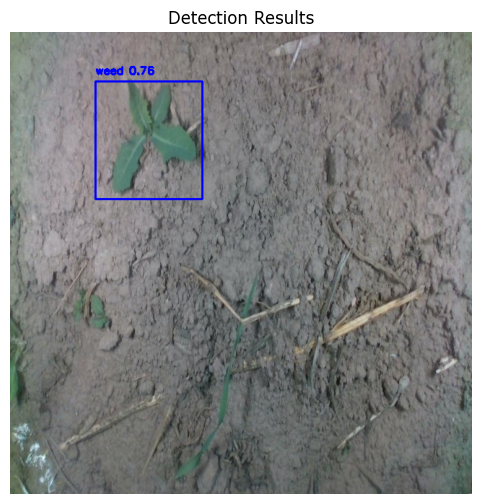

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the trained model
model = YOLO('G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/runs/detect/train/weights/best.pt')

# Path to the specific image
image_path = 'G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/37020_jpg.rf.7f132fbf69d5021fb159b3e27a989147.jpg'

# Run inference on the image
results = model(image_path)

# Get predictions from the results
predictions = results[0]

# Read the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes on the image
for box in predictions.boxes:
    # Extract box coordinates and class label
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls[0])
    label = model.names[class_id]  # Get class name from model
    confidence = box.conf[0]
    
    # Set color for different classes (crop: green, weed: blue)
    color = (0, 255, 0) if label == "crop" else (0, 0, 255)
    
    # Draw rectangle and label
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image
plt.figure(figsize=(6, 6))  # Set figure size
plt.imshow(img)
plt.title("Detection Results")
plt.axis('off')
plt.show()

In [3]:
from ultralytics import YOLO
import cv2

# Load the trained YOLO model
model = YOLO('G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/runs/detect/train/weights/best.pt')

# Open the webcam (0 = default camera, change to 1 or 2 if using an external camera)
cap = cv2.VideoCapture(0)

# Check if the webcam is opened
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Convert frame from BGR to RGB (YOLO expects RGB format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run YOLO model on the frame
    results = model(frame_rgb)

    # Get predictions
    predictions = results[0]

    # Draw bounding boxes
    for box in predictions.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        class_id = int(box.cls[0])
        label = model.names[class_id]
        confidence = box.conf[0]

        # Set color: Green for crop, Blue for weed
        color = (0, 255, 0) if label == "crop" else (255, 0, 0)

        # Draw bounding box and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the frame with detections
    cv2.imshow("Real-Time Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


0: 384x512 (no detections), 117.9ms
Speed: 5.1ms preprocess, 117.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 512)

0: 384x512 (no detections), 22.5ms
Speed: 3.9ms preprocess, 22.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 512)

0: 384x512 (no detections), 23.4ms
Speed: 6.8ms preprocess, 23.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 512)

0: 384x512 (no detections), 21.6ms
Speed: 3.6ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 512)

0: 384x512 (no detections), 28.1ms
Speed: 4.3ms preprocess, 28.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 512)

0: 384x512 (no detections), 26.8ms
Speed: 5.1ms preprocess, 26.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 512)

0: 384x512 (no detections), 30.9ms
Speed: 6.3ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 512)

0: 384x512 (no detections), 33.6ms
Speed: 5.9ms preprocess, 33.6ms

In [6]:
from ultralytics import YOLO
import cv2

# Load the trained YOLO model
model = YOLO('G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/runs/detect/train/weights/best.pt')

# Path to the input video
video_path = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/VID_20250322_155046.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define output video path
output_path = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v6/weed_detection_output.mp4"

# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop if no more frames

    # Convert frame from BGR to RGB (YOLO expects RGB format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run YOLO model on the frame
    results = model(frame_rgb, conf=0.5)

    # Get the first result (since YOLO returns a list)
    if results:
        predictions = results[0]  # Extract detection results

        # Draw bounding boxes
        for box in predictions.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            class_id = int(box.cls[0])
            label = model.names[class_id]
            confidence = box.conf[0]

            # Set color: Green for crop, Blue for weed
            color = (0, 255, 0) if label == "crop" else (255, 0, 0)

            # Draw bounding box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the processed frame to output video
    out.write(frame)

    # Display the frame with detections
    cv2.imshow("YOLO Video Detection", frame)

    # Press 'q' to exit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Processed video saved at: {output_path}")


0: 288x512 (no detections), 31.3ms
Speed: 8.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 (no detections), 30.4ms
Speed: 7.1ms preprocess, 30.4ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 (no detections), 29.1ms
Speed: 4.7ms preprocess, 29.1ms inference, 3.0ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 (no detections), 29.6ms
Speed: 6.1ms preprocess, 29.6ms inference, 4.0ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 (no detections), 38.1ms
Speed: 6.4ms preprocess, 38.1ms inference, 4.4ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 (no detections), 27.1ms
Speed: 4.7ms preprocess, 27.1ms inference, 3.3ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 (no detections), 31.6ms
Speed: 5.0ms preprocess, 31.6ms inference, 2.9ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 (no detections), 32.1ms
Speed: 4.9ms preprocess, 32.1ms i